# 🗞️ News Article Clustering with TF-IDF and KMeans
This notebook performs clustering on news articles using TF-IDF and KMeans algorithm. It follows a complete ML pipeline: data loading, preprocessing, EDA, model training, evaluation, and visualization.

In [1]:
import os
import pickle
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")


In [4]:
# Configuration
DATA_PATH = "../data/simulated_news.csv"
MODEL_DIR = "model"
MODEL_PATH = os.path.join(MODEL_DIR, "kmeans_model.pkl")
VECTORIZER_PATH = os.path.join(MODEL_DIR, "tfidf_vectorizer.pkl")
N_CLUSTERS = 5
RANDOM_STATE = 42

os.makedirs(MODEL_DIR, exist_ok=True)

In [5]:
# Load data
def load_data(path):
    if not os.path.exists(path):
        raise FileNotFoundError("Dataset file missing.")
    df = pd.read_csv(path)
    print(f"Dataset shape: {df.shape}")
    return df

df = load_data(DATA_PATH)
df.head()

Dataset shape: (1000, 2)


,Article,Topic
0,The team secured a thrilling win in the final ...,Sports
1,A dramatic comeback led the basketball team to...,Sports
2,A-list celebrities share behind-the-scenes Osc...,Entertainment
3,The finance ministry released the latest quart...,Politics
4,A dramatic comeback led the basketball team to...,Sports


In [6]:
# Basic EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  1000 non-null   object
 1   Topic    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [7]:
# Basic EDA
df.describe()

,Article,Topic
count,1000,1000
unique,50,5
top,Hollywood's biggest stars walked the red carpe...,Entertainment
freq,32,219


In [8]:
# Check missing values
df.isnull().sum()

Article    0
Topic      0
dtype: int64

In [9]:
# TF-IDF Vectorization
def preprocess_text(df):
    vectorizer = TfidfVectorizer(stop_words="english")
    X = vectorizer.fit_transform(df["Article"])
    return X, vectorizer

X, vectorizer = preprocess_text(df)
X.shape

(1000, 69)

In [10]:
# KMeans Model Training
def train_model(X):
    model = KMeans(n_clusters=N_CLUSTERS, random_state=RANDOM_STATE)
    model.fit(X)
    return model

model = train_model(X)

C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Evaluation
labels = model.predict(X)
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.4009


In [ ]:
# Save model and vectorizer
with open(MODEL_PATH, "wb") as f:
    pickle.dump(model, f)

with open(VECTORIZER_PATH, "wb") as f:
    pickle.dump(vectorizer, f)

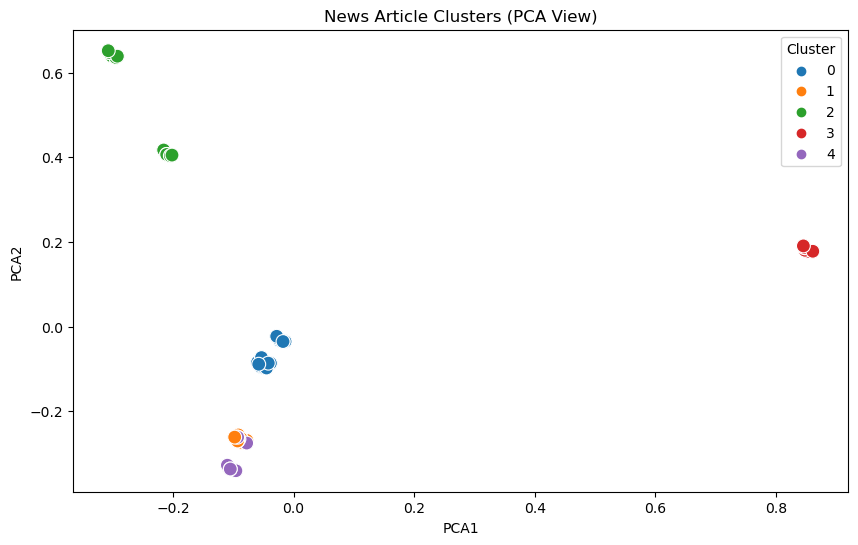

In [12]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

df["Cluster"] = labels
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=100)
plt.title("News Article Clusters (PCA View)")
plt.show()